In [ ]:
from retrieve_data import get_urls, download_images
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
urls, views = get_urls.get_urls_by_tag('pizza',
                                       max_count=1000,
                                       url_type='url_c',
                                       pickle_file='pizza_1000_url.pkl')

In [ ]:
urls[:5], views[:5]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(views)
sns.distplot(views).get_figure().savefig('view_diff_in_1000_pizza_images.png')
# plt.show()
# plt.savefig('view_diff_in_1000_pizza_images.png')

In [ ]:
for i in range(len(views)):
    if views[i] > 70000:
        print(urls[i])

In [ ]:
for i in range(len(views)):
    if views[i] < 1000:
        print(urls[i])

In [ ]:
import statistics
statistics.median(views),statistics.mean(views) 

In [ ]:
pickel_file_name = 'pizza_10000_url.pkl'

In [ ]:
urls, views = get_urls.get_urls_by_tag('pizza',
                                       max_count=10000,
                                       url_type='url_c',
                                       pickle_file=pickel_file_name)

In [2]:
import pickle
with open(pickel_file_name, 'rb') as handle:
    curr_urls, curr_views = pickle.load(handle)
download_images.multiprocess_download_image_by_url('output/pizza_urlc_10000', curr_urls)

In [ ]:
sns.distplot(curr_views).get_figure().savefig('view_diff_in_10000_pizza_images.png')

In [ ]:
statistics.median(curr_views),statistics.mean(curr_views) 

In [13]:
import pickle
with open("pizza_1000_url.pkl", 'rb') as handle:
    curr_urls, curr_views = pickle.load(handle)
len(curr_urls), len(curr_views)
print(curr_views[:10])

[79345, 9890, 30888, 35527, 45208, 18600, 21310, 16757, 28142, 77109]


In [10]:
with open("output/pizza_urlc_1000/views_count.pkl", 'wb') as handle:
    pickle.dump(curr_views, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
import pickle
with open("output/pizza_urlc_10000/views_count.pkl", 'rb') as handle:
    retrieved_views = pickle.load(handle)
print(len(retrieved_views))
print(retrieved_views[:10])

10000
[79345, 9890, 30888, 35527, 45208, 18600, 21310, 16757, 28142, 77109]


15884.0 21519.4432


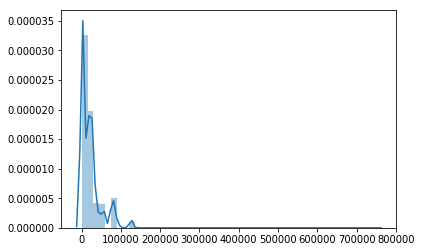

In [10]:
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.distplot(retrieved_views)
print(statistics.median(retrieved_views),statistics.mean(retrieved_views))

## Convert to percentage

In [20]:
import numpy as np
from scipy import stats

# mini example to demonstrate how it works
array = [2, 1, 1, 3, 7]
# print(np.argsort(np.argsort(array)) * 100. / (len(array) - 1))
print([stats.percentileofscore(array, i, 'rank') for i in array])

[ 50.   0.  25.  75. 100.]
[60.0, 30.0, 30.0, 80.0, 100.0]


[79345, 9890, 30888, 35527, 45208]
[94.66, 42.63, 80.74, 83.9, 85.49]


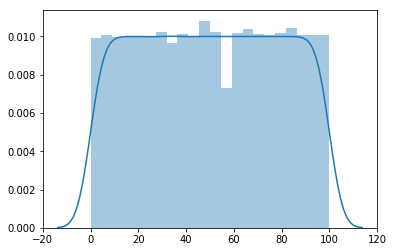

In [22]:
percentage_views = [stats.percentileofscore(retrieved_views, i, 'rank') for i in retrieved_views]
sns.distplot(percentage_views)
print(retrieved_views[:5])
print(percentage_views[:5])

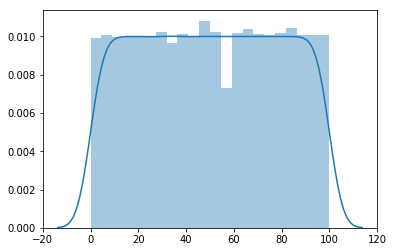

In [24]:
# save the figure
sns.distplot(percentage_views).get_figure().savefig('view_percentage_dist.png')

## Try to fix the skew


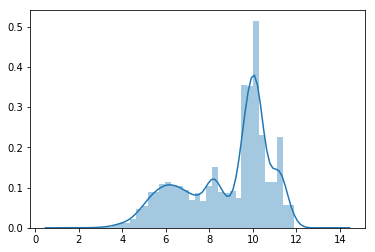

In [27]:
log_views = [math.log(i) for i in retrieved_views]
sns.distplot(log_views)

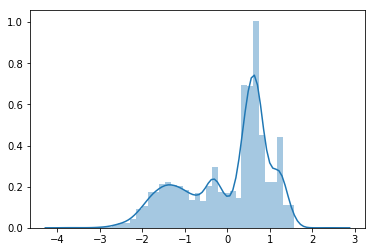

In [26]:
# standarize the log view
log_views = [math.log(i) for i in retrieved_views]
mean_log_views = statistics.mean(log_views)
std_log_views = statistics.stdev(log_views)
standardized_log_views = [(i - mean_log_views) / std_log_views for i in log_views]
sns.distplot(standardized_log_views)

# Normalize views

In [28]:
mean_views = statistics.mean(retrieved_views)
std_views = statistics.stdev(retrieved_views)
standardized_views = [(i - mean_views) / std_views for i in retrieved_views]
sns.distplot(standardized_views).get_figure().savefig('standarized_view.png')

# Load Image

In [1]:
from PIL import Image
import torchvision.transforms as tt

In [2]:
p0 = Image.open('output/pizza_urlc/image_0.jpg')
t0 = tt.functional.to_tensor(p0)

In [3]:
t0.shape

torch.Size([3, 600, 800])

In [4]:
diff_shapes = set()
for i in range(100):
    pi = Image.open('output/pizza_urlc/image_' + str(i) + '.jpg')
    ti = tt.functional.to_tensor(pi)
    diff_shapes.add(ti.shape)
print(diff_shapes)

{torch.Size([3, 800, 597]), torch.Size([3, 773, 800]), torch.Size([3, 598, 800]), torch.Size([3, 800, 598]), torch.Size([3, 583, 800]), torch.Size([3, 533, 800]), torch.Size([3, 800, 600]), torch.Size([3, 536, 800]), torch.Size([3, 777, 800]), torch.Size([3, 521, 800]), torch.Size([3, 599, 800]), torch.Size([3, 533, 799]), torch.Size([3, 449, 800]), torch.Size([3, 800, 800]), torch.Size([3, 576, 768]), torch.Size([3, 531, 800]), torch.Size([3, 799, 533]), torch.Size([3, 534, 800]), torch.Size([3, 611, 800]), torch.Size([3, 600, 800]), torch.Size([3, 800, 536]), torch.Size([3, 479, 799]), torch.Size([3, 450, 800]), torch.Size([3, 647, 799]), torch.Size([3, 630, 800]), torch.Size([3, 509, 800]), torch.Size([3, 618, 800]), torch.Size([3, 532, 800])}


In [5]:
fit_to_size = (800,800)
padding_value = 0.

In [8]:
diff_shapes = set()
scale_transforms = tt.Compose([
    # pad to desired size with padding_value
    tt.RandomCrop(fit_to_size, pad_if_needed=True, padding_mode='constant'),
    tt.ToTensor(),
])
for i in range(100):
    pi = Image.open('output/pizza_urlc/image_' + str(i) + '.jpg')
    ti = scale_transforms(pi)
    diff_shapes.add(ti.shape)
print(diff_shapes)

{torch.Size([3, 800, 800])}


In [23]:
p0 = Image.open('output/pizza_urlc/image_0.jpg')
t0 = tt.functional.to_tensor(p0)
t0_fixed = scale_transforms(p0)

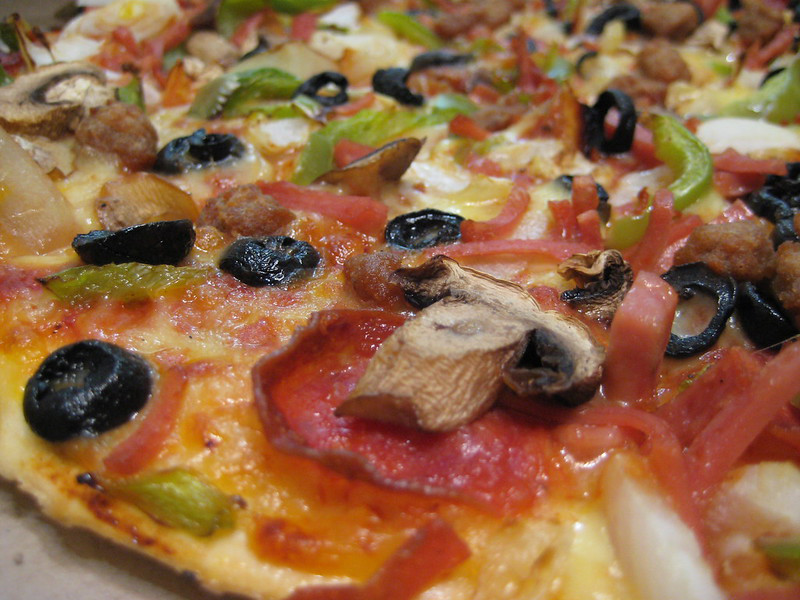

In [24]:
tt.functional.to_pil_image(t0)

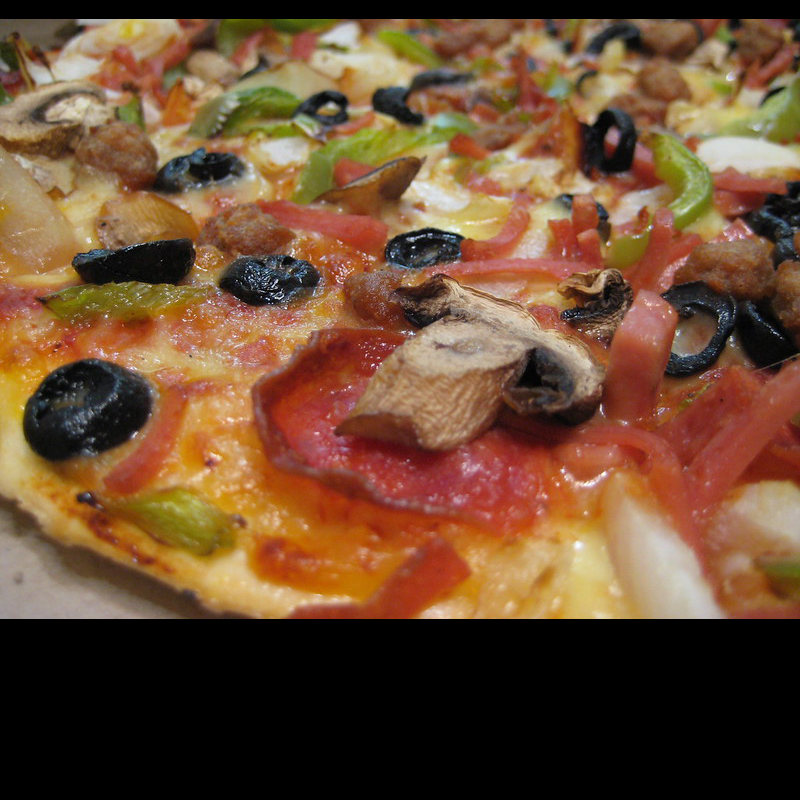

In [25]:
tt.functional.to_pil_image(t0_fixed)